In [1]:
import os, sys

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb
import statsmodels.api as sm
import seaborn as sn

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from mlens.model_selection import Evaluator
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from mlens.ensemble import SuperLearner
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[MLENS] backend: threading


In [2]:
df=pd.read_csv("E:/Masters/Spring 2022/ML/Term Project/Data Set/parkinsons.data")
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [3]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

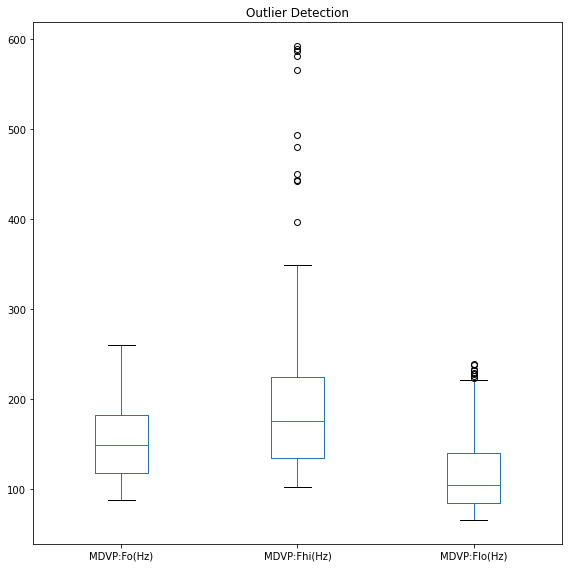

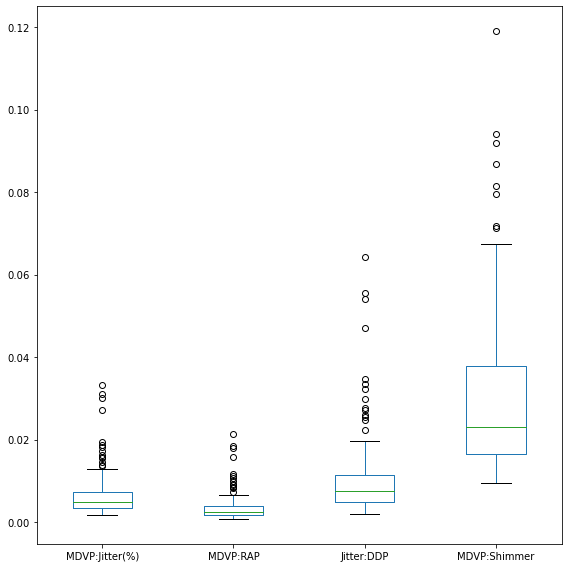

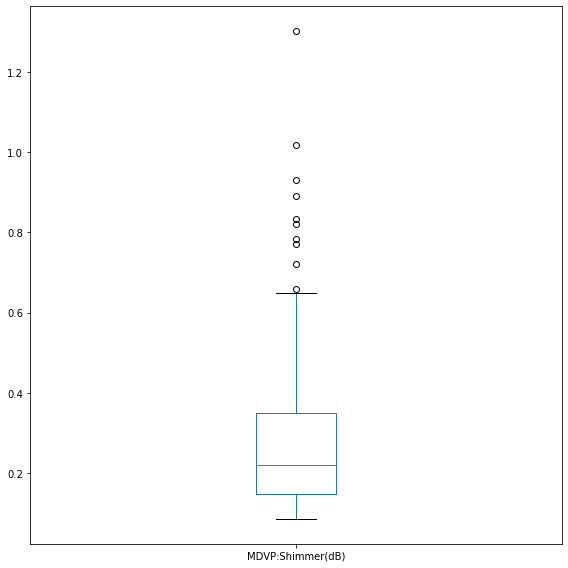

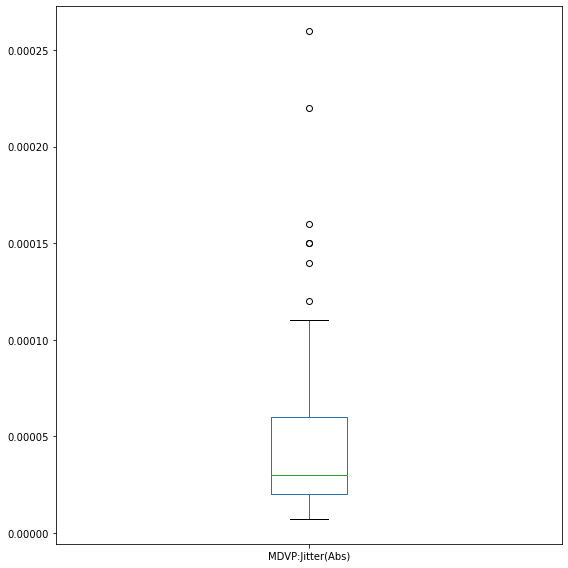

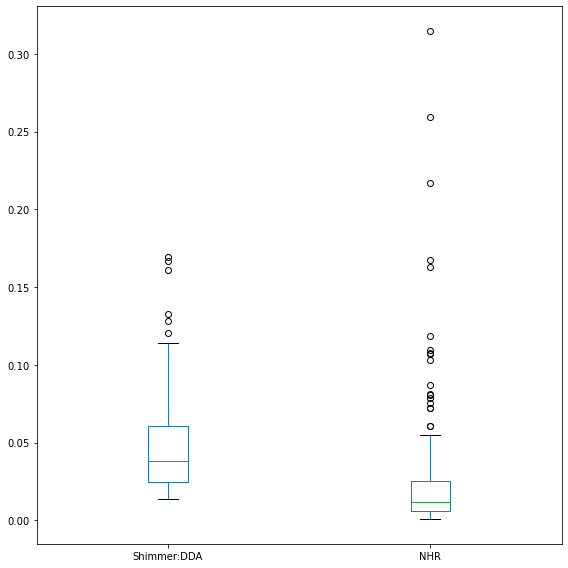

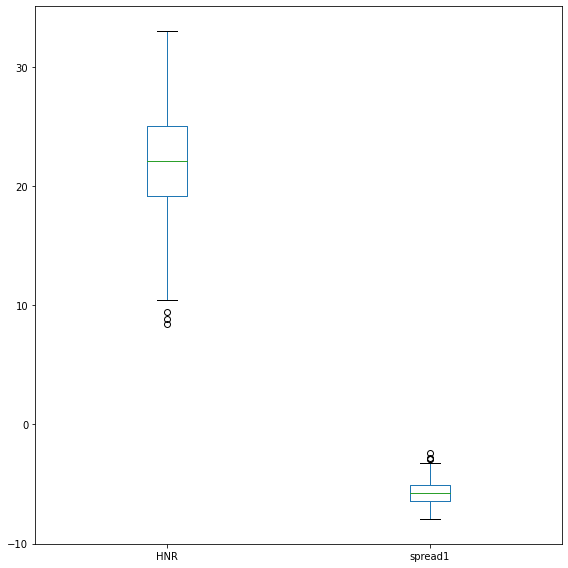

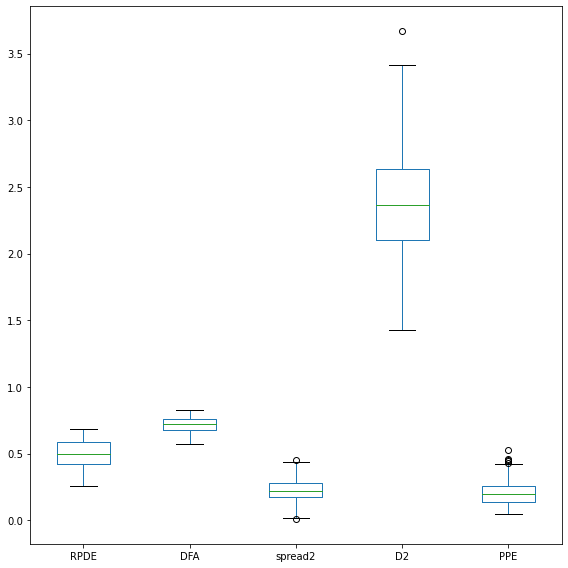

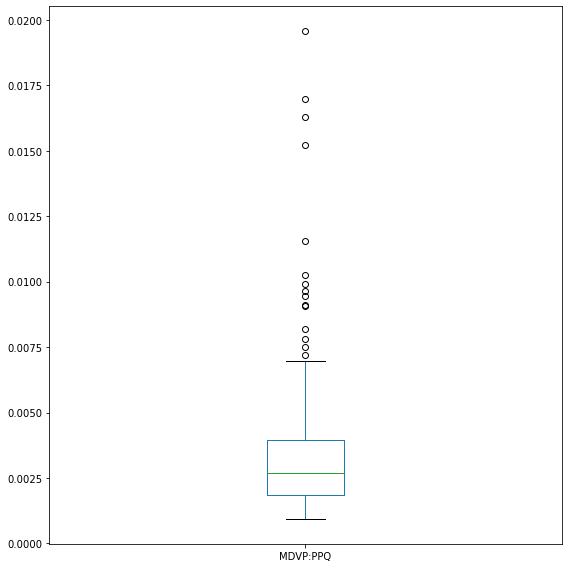

In [7]:
#Outlier Detection
plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True

# Plotting outliers in the dataset
outlier_1 = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)']].plot(kind='box', title='Outlier Detection')
outlier_2 = df[['MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer']].plot(kind='box')
outlier_3 = df[['MDVP:Shimmer(dB)']].plot(kind='box')
outlier_4= df[['MDVP:Jitter(Abs)']].plot(kind='box')
outlier_5= df[['Shimmer:DDA', 'NHR']].plot(kind='box')
outlier_6 = df[['HNR','spread1']].plot(kind='box')
outlier_7 = df[['RPDE', 'DFA', 'spread2', 'D2', 'PPE']].plot(kind='box')
outlier_8 = df[['MDVP:PPQ']].plot(kind='box')

In [8]:
# removing outliers in the dataset
def remove_outlier(dataframe,feature):
    col = dataframe[feature]
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data = dataframe[(dataframe[feature] >= lower) & (dataframe[feature] <= upper)]
    
    return data

df = remove_outlier(df,'MDVP:Fhi(Hz)')
df = remove_outlier(df,'MDVP:Flo(Hz)')
df = remove_outlier(df,'MDVP:Jitter(%)')
df = remove_outlier(df,'MDVP:RAP')
df = remove_outlier(df,'Jitter:DDP')
df = remove_outlier(df,'MDVP:Shimmer')
df = remove_outlier(df,'MDVP:Shimmer(dB)')
df = remove_outlier(df,'MDVP:Jitter(Abs)')
df = remove_outlier(df,'Shimmer:DDA')
df = remove_outlier(df,'NHR')
df = remove_outlier(df,'HNR')
df = remove_outlier(df,'spread1')
df = remove_outlier(df,'spread2')
df = remove_outlier(df,'D2')
df = remove_outlier(df,'PPE')
df = remove_outlier(df,'MDVP:PPQ')

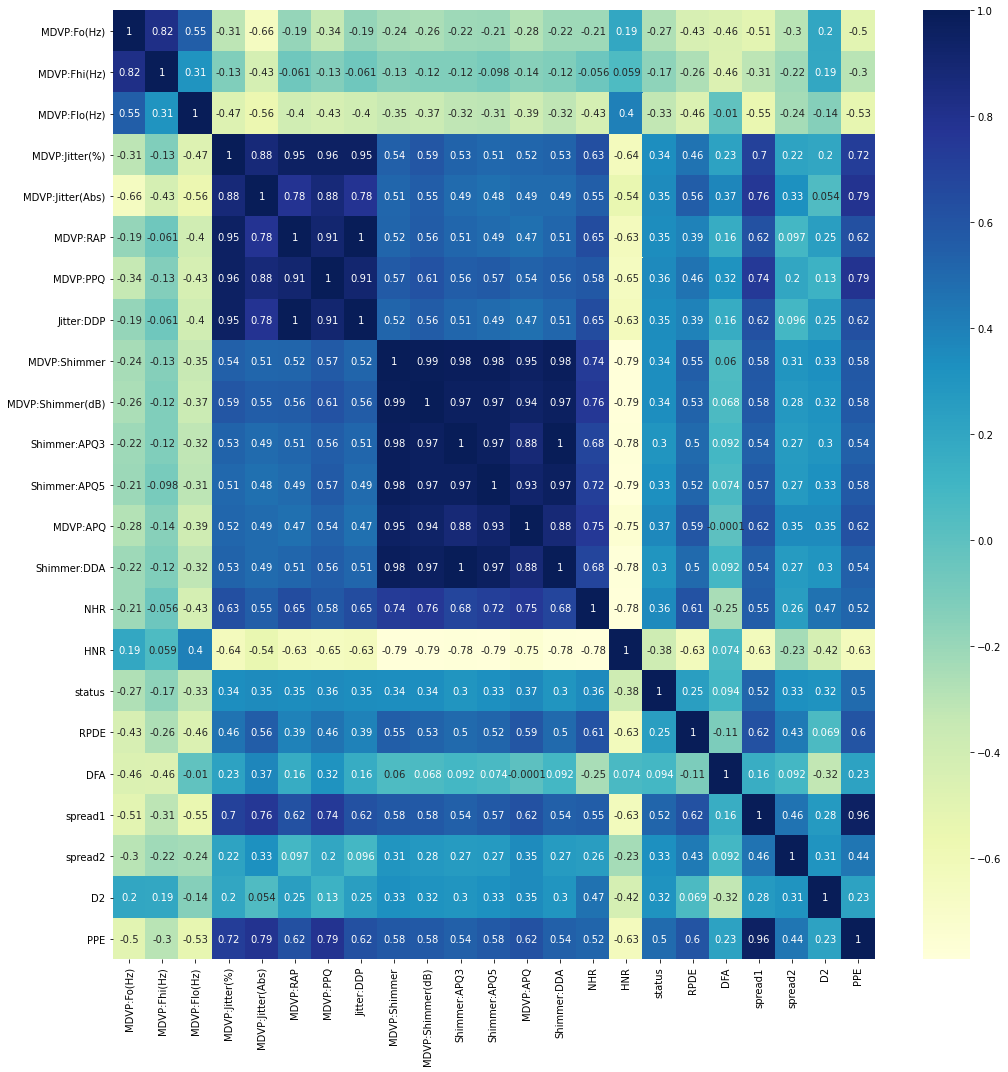

In [9]:
plt.figure(figsize=(15,15))
sn.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [10]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [11]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

105 33


In [12]:
os = RandomOverSampler()
X_res, y_res = os.fit_resample(features, labels)

# Using Extreme Gradient Boosting:

In [13]:
df_xgb=df
features=X_res
labels=y_res

scaler=MinMaxScaler((-1,1))
x_xgb=scaler.fit_transform(features)
y_xgb=labels

X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb=train_test_split(x_xgb, y_xgb, random_state=7)

In [14]:
model=XGBClassifier()
model.fit(X_train_xgb,y_train_xgb)

y_pred_xgb=model.predict(X_test_xgb)
print(accuracy_score(y_test_xgb, y_pred_xgb))

0.8679245283018868


# Using Random Forest:

In [15]:
rf_df=df
features=X_res
labels=y_res

scaler=MinMaxScaler((-1,1))
rf_x=scaler.fit_transform(features)
rf_y=labels

X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(rf_x, rf_y, random_state=7)

In [16]:
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=7)

In [17]:
random_forest.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=7)

In [18]:
model=RandomForestClassifier()
model.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [19]:
y_predict_rf = random_forest.predict(X_test_rf)
print(accuracy_score(y_test_rf, y_predict_rf))

0.8867924528301887


# Using KNN:

In [20]:
knn_df=df
features=X_res
labels=y_res

scaler=MinMaxScaler((-1,1))
knn_x=scaler.fit_transform(features)
knn_y=labels

X_train_knn,X_test_knn,y_train_knn,y_test_knn=train_test_split(knn_x, knn_y, random_state=7)

In [21]:
pca = PCA(n_components = 2)
X_train_knn = pca.fit_transform(X_train_knn)
X_test_knn = pca.transform(X_test_knn)

In [22]:
clf = KNeighborsClassifier(n_neighbors = 5,p=2)
clf.fit(X_train_knn,y_train_knn)
y_pred_knn = clf.predict(X_test_knn)

In [23]:
confusion=confusion_matrix(y_test_knn,y_pred_knn)
print(accuracy_score(y_test_knn,y_pred_knn))

0.6981132075471698


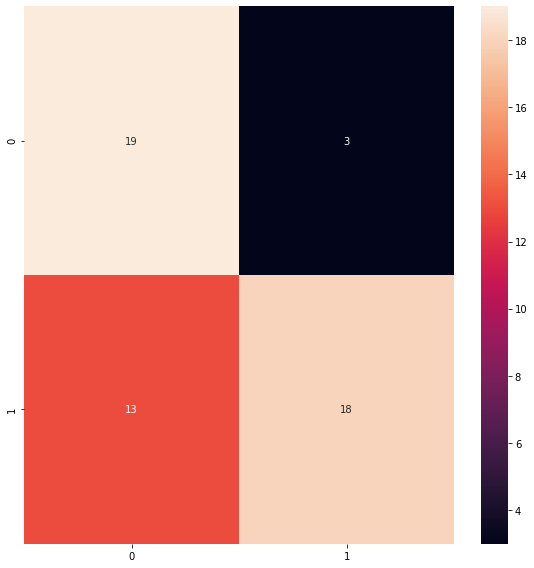

In [24]:
sn.heatmap(confusion, annot=True)
plt.show()

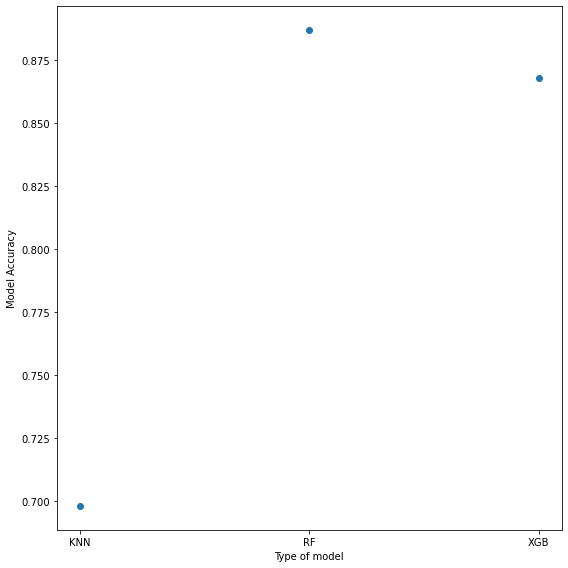

In [25]:
indvidual_models = ['KNN', 'RF', 'XGB']
indvidual_accuracy=[accuracy_score(y_test_knn, y_pred_knn), accuracy_score(y_test_rf, y_predict_rf), accuracy_score(y_test_xgb, y_pred_xgb)]

plt.scatter(indvidual_models, indvidual_accuracy)
plt.xlabel("Type of model")
plt.ylabel("Model Accuracy")
plt.show()

# Using 5 Fold Cross Validation:

In [26]:
df_cv=df
features=X_res
labels=y_res
scaler=MinMaxScaler((-1,1))
x_cv=scaler.fit_transform(features)
y_cv=labels
X_train_cv,X_test_cv,y_train_cv,y_test_cv=train_test_split(x_cv, y_cv, random_state=7)

In [27]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
model=['LR', 'RF', 'SVM', 'KNC', 'DTC', 'ABC', 'BC', 'GBC', 'clf_XGB']
clfs = []
accuracy=[]
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Linear Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train_cv, y_train_cv, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train_cv, y_train_cv)
    clfs.append(md)
    accuracy.append(sklearn.metrics.accuracy_score(clf.predict(X_test_cv), y_test_cv))
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test_cv), y_test_cv)))

5-fold cross validation:

Train CV Accuracy: 0.814 (+/- 0.080) [Linear Regression]
Test Accuracy: 0.7170 
Train CV Accuracy: 0.936 (+/- 0.035) [Random Forest]
Test Accuracy: 0.9434 
Train CV Accuracy: 0.891 (+/- 0.075) [Support Vector Machine]
Test Accuracy: 0.7925 
Train CV Accuracy: 0.885 (+/- 0.088) [KNeighbors]
Test Accuracy: 0.7925 
Train CV Accuracy: 0.910 (+/- 0.052) [Decision Tree]
Test Accuracy: 0.8491 
Train CV Accuracy: 0.955 (+/- 0.039) [Ada Boost]
Test Accuracy: 0.8679 
Train CV Accuracy: 0.930 (+/- 0.042) [Bagging]
Test Accuracy: 0.8113 
Train CV Accuracy: 0.929 (+/- 0.063) [Gradient Boosting]
Test Accuracy: 0.9057 
Train CV Accuracy: 0.942 (+/- 0.043) [XGBoost]
Test Accuracy: 0.8679 
Wall time: 8.53 s


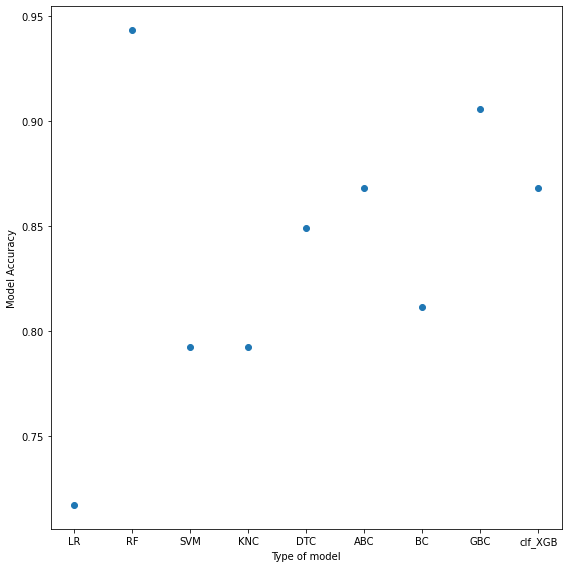

In [28]:
plt.scatter(model,accuracy)
plt.xlabel("Type of model")
plt.ylabel("Model Accuracy")
plt.show()

# Using Ensemble:

In [29]:
df_en=df
features=X_res
labels=y_res
scaler=MinMaxScaler((-1,1))
x_en=scaler.fit_transform(features)
y_en=labels
X_train_en,X_test_en,y_train_en,y_test_en=train_test_split(x_en, y_en, random_state=7)

In [30]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=7, verbose=2, folds=5)

In [31]:
ensemble.add([ABC, clf_XGB])

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=9412, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...3122790>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=7, sample_size=20,
       scorer=<function accuracy_score at 0x000001D143122790>,
       shuffle=False, verbose=2)

In [32]:
ensemble.add_meta(KNC)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=9412, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...3122790>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=7, sample_size=20,
       scorer=<function accuracy_score at 0x000001D143122790>,
       shuffle=False, verbose=2)

In [33]:
ensemble.fit(X_train_en, y_train_en)


Fitting 2 layers
Processing layer-1             done | 00:00:04
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:04


SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=9412, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...3122790>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=7, sample_size=20,
       scorer=<function accuracy_score at 0x000001D143122790>,
       shuffle=False, verbose=2)

In [34]:
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train_en), y_train_en))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test_en), y_test_en))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.8301886792452831


In [35]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                               score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier       0.96     0.02  1.88  0.35  0.13  0.05
layer-1  xgbclassifier            0.94     0.04  0.53  0.25  0.01  0.00

